                                        Name: Abhishek Bhakare
                                              Sub: LP-IV                       
        

2. Implementing Feedforward neural networks with Keras and TensorFlow

a. Import the necessary packages
b. Load the training and testing data (MNIST/CIFAR10)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


In [3]:
import random

# LOADING THE DATASET

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

# DEFINING THE ARCHITECTURE USING KERAS

In [5]:
import keras
model=Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# TRAINING THE MODEL USING SGD

In [6]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7250 - loss: 1.0384 - val_accuracy: 0.9023 - val_loss: 0.3571
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9019 - loss: 0.3502 - val_accuracy: 0.9193 - val_loss: 0.2915
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9172 - loss: 0.2957 - val_accuracy: 0.9282 - val_loss: 0.2585
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9257 - loss: 0.2625 - val_accuracy: 0.9340 - val_loss: 0.2379
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9343 - loss: 0.2382 - val_accuracy: 0.9388 - val_loss: 0.2174


# PLOTTING TRAINING LOSS AND ACCURACY

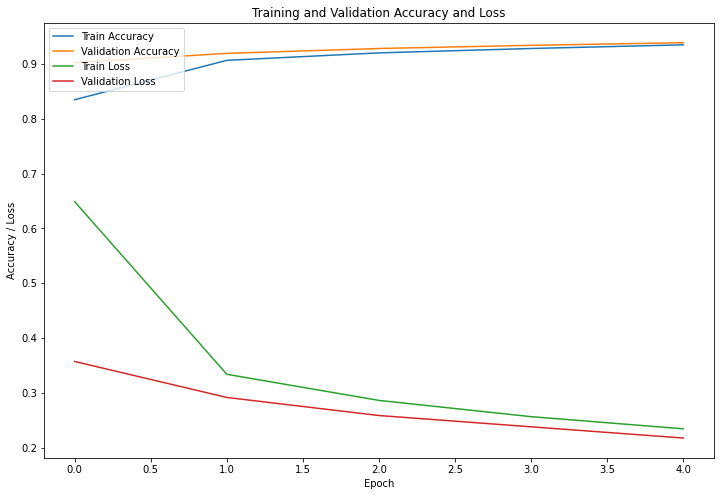

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.plot(H.history['loss'], label='Train Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend(loc='upper left')

plt.show()

# EVALUATING THE MODEL

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%3f"% test_loss)
print("Accuracy=%3f"% test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9290 - loss: 0.2516
Loss=0.217422
Accuracy=0.938800


# PREDICTION OF THE MODEL

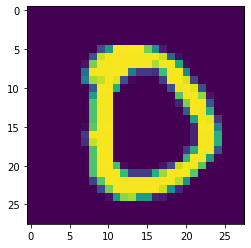

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The handwritten number in the image is 0 


In [9]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
prediction=model.predict(x_test)
print("The handwritten number in the image is %d "% np.argmax(prediction[n]))